### **檔案說明**
* 此

### **一、導入函式庫**

In [1]:
# 載入要使用的函式庫
import pandas as pd
import Ridetrack_Eric_v1
SensorFusion = Ridetrack_Eric_v1.SensorFusion()
AutoTag = Ridetrack_Eric_v1.AutoTag()
DrivePSTs = Ridetrack_Eric_v1.DrivePSTs()
else_ = Ridetrack_Eric_v1.else_()

### **二、定義訓練與測試資料的路徑**

In [3]:
# 這裡修改個人的IMU與ECU的資料路徑 (不需要副檔名)
# train
train_imu_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_sliding_window',  # 若不使用 r，反斜線需要雙寫"\\"
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_2_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_HPTsai_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_sliding_window',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_Yian_sliding_window'
]

train_ecu_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_hptsai_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_ECU',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_yian_ECU'
]

train_label_file = [
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_sliding_window_only_mark',  # 若不使用 r，反斜線需要雙寫"\\"
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_2_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_HPTsai_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_sliding_window_only_mark',
    r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_Yian_sliding_window_only_mark'
]

# test
test_imu_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Eric_sliding_window'
test_ecu_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Eric_ECU'
test_label_file = r'D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Eric_sliding_window_only_mark'

train_name_file = r'mixed_data\mixed_train'  # 命名用
test_name_file = r'mixed_data\20240708_Eric_test'  # 命名用

# 一開始閒置的時間(merge完後的檔案：開始幾筆snapshot是Idle)(校正角速度用)
k = 1

### **三、處理訓練資料**

In [6]:
for imu_file, ecu_file, label_file in zip(train_imu_file, train_ecu_file, train_label_file):
       print(f'Processing files: {imu_file}, {ecu_file}, {label_file}')
       # SensorFusion.Axis_Process(f'{train_imu_file}.xls', f'{train_imu_file}.csv', app_time_error=0)
       # SensorFusion.ECU_Reverse(f'{train_ecu_file}.txt', f'{train_ecu_file}.csv')
       SensorFusion.Data_Merge(f'{ecu_file}.csv', f'{imu_file}.csv',  f'{imu_file}_merged.csv')

       # df = pd.read_csv(f'{imu_file}_merged.csv')
       # SensorFusion.calibrate_angles(df, f'{imu_file}_merged.csv')

       df = pd.read_csv(f'{imu_file}_merged.csv')
       SensorFusion.calibrate_imu(df, k, f'{imu_file}_merged.csv')

       feature = ['Atmospheric Pressure', 'Inclination Switch',
              'Fault Code Count', 'Ignition Coil Current Diagnosis',
              'Fault Light Mileage',
              'Ignition Advance Angle', 'Idling Correction Ignition Angle',
              'Fuel Injection Prohibition Mode', 'Injection Mode',
              'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
              'Lambda Setting', 'Air-Fuel Ratio Rich',
              'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
              'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
              'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
              'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
              'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
              'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
              'Engine Temperature', 'Water Temperature PWM',
              'Ignition Magnetization Time', 'Fuel Injection Time',
              'Closed Loop Fuel Correction', 'Intake Temperature',
              'Combustion Chamber Intake Temperature', 'TPS Opening',
              'TPS Idling Learning Value', 'Battery Voltage', 'O2 Voltage',
              'Vehicle Speed', 'TPS Voltage', 
              'X-axis Angular Velocity', 'Y-axis Angular Velocity',
              'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
              'Z-axis Acceleration', 'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)']

       df = pd.read_csv(f'{imu_file}_merged.csv')
       SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path=f'{imu_file}_merged.csv')

       # 合併CSV檔案
       if imu_file == train_imu_file[0]:
              df_combined = pd.DataFrame()  # 初始化一個空的 DataFrame

       # 依序合併 CSV 檔案
       df = pd.read_csv(f'{imu_file}_merged.csv')
       if df_combined.empty:
              df_combined = df
       else:
              df_combined = pd.concat([df_combined, df], axis=0)  # 合併兩個 DataFrame，axis=0 表示按行合併
       
       # 儲存合併後的 DataFrame 為新的 CSV 檔案
       df_combined = df_combined.drop(columns=['ECU Absolute Time', 'Absolute Time'])
       df_combined.to_csv(f'{train_name_file}.csv', index=False)

Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_alan_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5573/5573 [00:18<00:00, 305.85it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5573/5573 [00:37<00:00, 149.48it/s]


Execution time: 0.0 hours 1.0 minutes 15.313831090927124 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1492.99it/s]


Execution time: 0.0 hours 0.0 minutes 2.6899666786193848 seconds


Applying Kalman filter: 100%|██████████| 67618/67618 [00:49<00:00, 1379.84it/s]


Execution time: 0.0 hours 0.0 minutes 53.48788547515869 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_2_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_2_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_frank_2_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 4864/4864 [00:14<00:00, 330.84it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 4864/4864 [00:28<00:00, 169.30it/s]


Execution time: 0.0 hours 0.0 minutes 59.94792103767395 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1504.50it/s]


Execution time: 0.0 hours 0.0 minutes 2.242537260055542 seconds


Applying Kalman filter: 100%|██████████| 58200/58200 [00:38<00:00, 1499.48it/s]


Execution time: 0.0 hours 0.0 minutes 42.52595329284668 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_kino_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 4928/4928 [00:14<00:00, 337.77it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 4928/4928 [00:28<00:00, 173.27it/s]


Execution time: 0.0 hours 0.0 minutes 58.67000985145569 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2004.13it/s]


Execution time: 0.0 hours 0.0 minutes 2.2578325271606445 seconds


Applying Kalman filter: 100%|██████████| 59870/59870 [00:40<00:00, 1461.09it/s]


Execution time: 0.0 hours 0.0 minutes 44.775694131851196 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Liyi_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5131/5131 [00:16<00:00, 306.82it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5131/5131 [00:32<00:00, 155.93it/s]


Execution time: 0.0 hours 1.0 minutes 5.897690773010254 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2004.77it/s]


Execution time: 0.0 hours 0.0 minutes 2.340776205062866 seconds


Applying Kalman filter: 100%|██████████| 61629/61629 [00:46<00:00, 1338.10it/s]


Execution time: 0.0 hours 0.0 minutes 50.00961399078369 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_alic_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 6734/6734 [00:26<00:00, 254.91it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 6734/6734 [00:51<00:00, 129.59it/s]


Execution time: 0.0 hours 1.0 minutes 39.83193755149841 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1495.12it/s]


Execution time: 0.0 hours 0.0 minutes 3.167388916015625 seconds


Applying Kalman filter: 100%|██████████| 81037/81037 [01:01<00:00, 1324.80it/s]


Execution time: 0.0 hours 1.0 minutes 6.2926106452941895 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_ben_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5370/5370 [00:17<00:00, 313.59it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5370/5370 [00:33<00:00, 159.68it/s]


Execution time: 0.0 hours 1.0 minutes 8.232465267181396 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1503.87it/s]


Execution time: 0.0 hours 0.0 minutes 2.4674062728881836 seconds


Applying Kalman filter: 100%|██████████| 64545/64545 [00:41<00:00, 1552.58it/s]


Execution time: 0.0 hours 0.0 minutes 45.71058702468872 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_family_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 3433/3433 [00:20<00:00, 164.83it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 3433/3433 [00:40<00:00, 83.79it/s]


Execution time: 0.0 hours 1.0 minutes 12.85061764717102 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2003.17it/s]


Execution time: 0.0 hours 0.0 minutes 1.5685021877288818 seconds


Applying Kalman filter: 100%|██████████| 40125/40125 [00:25<00:00, 1556.02it/s]


Execution time: 0.0 hours 0.0 minutes 28.344003677368164 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_HPTsai_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_hptsai_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_HPTsai_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_HPTsai_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5523/5523 [00:17<00:00, 313.67it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5523/5523 [00:34<00:00, 160.20it/s]


Execution time: 0.0 hours 1.0 minutes 9.197240591049194 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1504.14it/s]


Execution time: 0.0 hours 0.0 minutes 2.4663925170898438 seconds


Applying Kalman filter: 100%|██████████| 65799/65799 [00:42<00:00, 1534.24it/s]


Execution time: 0.0 hours 0.0 minutes 46.95354413986206 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_jeff_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5360/5360 [00:16<00:00, 327.89it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5360/5360 [00:31<00:00, 168.26it/s]


Execution time: 0.0 hours 1.0 minutes 4.461597204208374 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1504.23it/s]


Execution time: 0.0 hours 0.0 minutes 2.3656105995178223 seconds


Applying Kalman filter: 100%|██████████| 62361/62361 [00:39<00:00, 1569.30it/s]


Execution time: 0.0 hours 0.0 minutes 43.62447381019592 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_kevin_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 4320/4320 [00:11<00:00, 383.36it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 4320/4320 [00:21<00:00, 196.87it/s]


Execution time: 0.0 hours 0.0 minutes 46.733513832092285 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1492.46it/s]


Execution time: 0.0 hours 0.0 minutes 1.9612414836883545 seconds


Applying Kalman filter: 100%|██████████| 52033/52033 [00:33<00:00, 1545.61it/s]


Execution time: 0.0 hours 0.0 minutes 36.92418599128723 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240709_data\20240709_sKevin_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 3330/3330 [00:06<00:00, 476.34it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 3330/3330 [00:13<00:00, 246.72it/s]


Execution time: 0.0 hours 0.0 minutes 30.693963766098022 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2005.24it/s]


Execution time: 0.0 hours 0.0 minutes 1.4907047748565674 seconds


Applying Kalman filter: 100%|██████████| 39271/39271 [00:25<00:00, 1518.79it/s]


Execution time: 0.0 hours 0.0 minutes 28.293344259262085 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_kevin_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5113/5113 [00:15<00:00, 332.12it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5113/5113 [00:30<00:00, 169.89it/s]


Execution time: 0.0 hours 1.0 minutes 1.4897758960723877 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 2004.61it/s]


Execution time: 0.0 hours 0.0 minutes 2.323798656463623 seconds


Applying Kalman filter: 100%|██████████| 61816/61816 [00:39<00:00, 1573.84it/s]


Execution time: 0.0 hours 0.0 minutes 43.17182970046997 seconds
Processing files: D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_Yian_sliding_window, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_yian_ECU, D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_Yian_sliding_window_only_mark
Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240710_data\20240710_Yian_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 5165/5165 [00:15<00:00, 333.13it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 5165/5165 [00:30<00:00, 170.14it/s]


Execution time: 0.0 hours 1.0 minutes 1.8849036693572998 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1918.42it/s]


Execution time: 0.0 hours 0.0 minutes 2.3278138637542725 seconds


Applying Kalman filter: 100%|██████████| 61740/61740 [00:39<00:00, 1577.61it/s]


Execution time: 0.0 hours 0.0 minutes 43.01883602142334 seconds


In [19]:
df = pd.read_csv(f'{train_name_file}.csv')

# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']
# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)', 'Vehicle Speed']
RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity', 'Roll (deg)'] 

# 利用k-means進行分群以得到群中心模型
AutoTag.cluster_data(df, RF_10, method="kmeans", n_clusters=11, model_path=f'{train_name_file}_model.pkl', save_path=f'{train_name_file}.csv')

# df_train = pd.read_csv(f'{train_name_file}.csv')
# train_label = pd.read_csv(f'{train_label_file}.csv', skip_blank_lines=False)  # skip_blank_lines=False 要把空白值算入
# df_train['Action'] = train_label['Action']

Execution time: 0.0 hours 0.0 minutes 58.10060119628906 seconds


,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,Injection Mode,Bypass Delay Correction,...,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,Pitch (deg),Roll (deg),Yaw (deg),Action,Action Element
0,1003.996104,0.756745,0.0,0.078047,0.0,10.770055,-0.468590,0.000000e+00,4.995005,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.071899,-0.009654,-0.011941,NaN,6
1,1004.521727,0.757141,0.0,0.078088,0.0,10.775693,-0.468836,0.000000e+00,4.997621,0.0,...,0.061353,-0.008924,-1.647182,5.618470,-3.662911,0.007553,0.036441,-0.035262,NaN,6
2,1004.705421,0.757280,0.0,0.079977,0.0,10.057524,-1.189061,0.000000e+00,4.998534,0.0,...,0.021014,0.018643,-1.516615,3.105587,-1.777895,-0.024418,-0.090194,-0.001982,NaN,6
3,1004.801507,0.757352,0.0,0.080966,0.0,9.681868,-1.565793,0.000000e+00,4.999012,0.0,...,0.049254,0.024376,-2.044960,5.864560,-3.105042,0.002504,-0.235926,0.033867,NaN,6
4,1004.860822,0.757397,0.0,0.081576,0.0,9.449971,-1.798354,0.000000e+00,4.999308,0.0,...,0.011934,0.030143,-1.594132,3.426670,-1.757918,-0.045346,-0.405967,0.077957,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776039,1006.000000,0.757502,0.0,0.078412,0.0,10.808345,-0.441537,1.174726e-114,5.000000,0.0,...,-0.069751,-0.189278,2.478118,-8.179593,5.084314,2.489360,0.486927,-1.372472,NaN,6
776040,1006.000000,0.757502,0.0,0.078334,0.0,10.800910,-0.448972,8.573667e-115,5.000000,0.0,...,-0.089111,-0.162318,2.737456,-7.516991,5.599435,2.409561,1.037376,-1.668776,NaN,6
776041,1006.000000,0.757502,0.0,0.078278,0.0,10.795484,-0.454399,6.257438e-115,5.000000,0.0,...,-0.104392,-0.097746,1.788349,-6.940255,5.252262,2.234436,1.220785,-1.709207,NaN,6
776042,1006.000000,0.757502,0.0,0.078236,0.0,10.791523,-0.458359,4.566952e-115,5.000000,0.0,...,-0.077557,-0.146164,2.284484,-6.727599,5.036395,2.156762,1.688072,-1.950777,NaN,6


### **四、處理測試資料**

In [20]:
# Process testing data
# SensorFusion.Axis_Process(f'{test_imu_file}.xls', f'{test_imu_file}.csv', app_time_error=4)
# SensorFusion.ECU_Reverse(f'{test_ecu_file}.txt', f'{test_ecu_file}.csv')
SensorFusion.Data_Merge(f'{test_ecu_file}.csv', f'{test_imu_file}.csv',  f'{test_name_file}_merged.csv')

# df = pd.read_csv(f'{test_name_file}_merged.csv')
# SensorFusion.calibrate_angles(df, f'{test_name_file}_merged.csv')

df = pd.read_csv(f'{test_name_file}_merged.csv')
SensorFusion.calibrate_imu(df, k, f'{test_name_file}_merged.csv')

feature = ['Atmospheric Pressure', 'Inclination Switch',
       'Fault Code Count', 'Ignition Coil Current Diagnosis',
       'Fault Light Mileage',
       'Ignition Advance Angle', 'Idling Correction Ignition Angle',
       'Fuel Injection Prohibition Mode', 'Injection Mode',
       'Bypass Delay Correction', 'ABV Opening', 'ABV Idling Correction',
       'Lambda Setting', 'Air-Fuel Ratio Rich',
       'Closed Loop Control', 'Air Flow', 'Throttle Valve Air Flow',
       'Intake Manifold Pressure', 'Intake Manifold Front Pressure',
       'MFF_AD_ADD_MMV_REL', 'MFF_AD_FAC_MMV_REL', 'MFF_AD_ADD_MMV',
       'MFF_AD_FAC_MMV', 'Fuel Injection Quantity', 'MFF_WUP_COR',
       'Ignition Mode', 'Engine RPM', 'Engine RPM Limit', 'Idling Target RPM',
       'Fuel Injection Start Angle', 'Fuel Pump State', 'Engine State',
       'Engine Temperature', 'Water Temperature PWM',
       'Ignition Magnetization Time', 'Fuel Injection Time',
       'Closed Loop Fuel Correction', 'Intake Temperature',
       'Combustion Chamber Intake Temperature', 'TPS Opening',
       'TPS Idling Learning Value', 'Battery Voltage', 'O2 Voltage',
       'Vehicle Speed', 'TPS Voltage', 
       'X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)']

df = pd.read_csv(f'{test_name_file}_merged.csv')
SensorFusion.apply_kalman_filter(df, feature,  q_noise=0.0001, r_noise=0.001, save_path=f'{test_name_file}_merged.csv')

# df = pd.read_csv(f'{test_name_file}_merged.csv')

# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']
# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)', 'Vehicle Speed']
# RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
#  'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity', 'Roll (deg)'] 

# 利用k-means進行分群以得到群中心模型
# AutoTag.cluster_data(df, feature, method="kmeans", n_clusters=11, model_path=f'{test_name_file}_model.pkl', save_path=f'{test_name_file}_merged.csv')

# df_test = pd.read_csv(f'{test_name_file}_merged.csv')
# test_label = pd.read_csv(f'{test_label_file}.csv', skip_blank_lines=False)  # skip_blank_lines=False 要把空白值算入
# df_test['Action'] = test_label['Action']

Action欄位已成功儲存至 D:\KDD_Lab\機車行為辨識\motor_熊御仲\20240708_data\20240708_Eric_sliding_window_only_mark.csv

【Data Engineering Megre Data Part 1 (1/2)】


100%|██████████| 4201/4201 [00:10<00:00, 389.14it/s]



【Data Engineering Megre Data Part 2 (2/2)】


100%|██████████| 4201/4201 [00:20<00:00, 200.31it/s]


Execution time: 0.0 hours 0.0 minutes 44.89845037460327 seconds


Calibrating Acceleration & Angular Velocity data: 100%|██████████| 6/6 [00:00<00:00, 1512.91it/s]


Execution time: 0.0 hours 0.0 minutes 1.8421809673309326 seconds


Applying Kalman filter: 100%|██████████| 47836/47836 [00:49<00:00, 972.86it/s] 


Execution time: 0.0 hours 0.0 minutes 52.36559867858887 seconds


,ECU Absolute Time,Atmospheric Pressure,Inclination Switch,Fault Code Count,Ignition Coil Current Diagnosis,Fault Light Mileage,Ignition Advance Angle,Idling Correction Ignition Angle,Fuel Injection Prohibition Mode,Injection Mode,...,Y-axis Angular Velocity,Z-axis Angular Velocity,X-axis Acceleration,Y-axis Acceleration,Z-axis Acceleration,Pitch (deg),Roll (deg),Yaw (deg),Absolute Time,Action
0,2024-07-08 14:28:52.060290048+08:00,992.008091,0.756745,0.0,0.082925,0.0,10.301778,-0.936867,0.000000e+00,4.995005,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004573,-0.719749,0.051066,2024-07-08 14:28:52.395428+08:00,NaN
1,2024-07-08 14:28:52.060290048+08:00,992.527438,0.757141,0.0,0.082968,0.0,10.307171,-0.937358,0.000000e+00,4.997621,...,-0.006693,-0.054660,1.060514,-6.312944,10.279218,-0.020730,0.087194,-0.026339,2024-07-08 14:28:52.415476+08:00,NaN
2,2024-07-08 14:28:52.060290048+08:00,992.708939,0.757280,0.0,0.082983,0.0,10.309056,-0.937529,0.000000e+00,4.998534,...,-0.004941,-0.014027,0.640320,-7.160077,9.093554,-0.030516,-0.195107,0.003696,2024-07-08 14:28:52.448809+08:00,NaN
3,2024-07-08 14:28:52.465238016+08:00,992.803877,0.757352,0.0,0.082991,0.0,10.462938,-0.784723,0.000000e+00,4.999012,...,0.003273,-0.019181,0.907835,-9.627397,12.520211,-0.024542,-0.213448,0.017374,2024-07-08 14:28:52.482142+08:00,NaN
4,2024-07-08 14:28:52.465238016+08:00,992.862484,0.757397,0.0,0.082996,0.0,10.557930,-0.690394,0.000000e+00,4.999308,...,-0.002162,-0.004536,0.590761,-7.516006,8.850382,-0.030591,-0.582336,0.058158,2024-07-08 14:28:52.515476+08:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47831,2024-07-08 14:55:26.506764800+08:00,1000.000000,0.757502,0.0,0.078509,0.0,10.816862,-0.433021,3.332275e-314,5.000000,...,0.027751,-0.056808,0.788036,-8.278109,12.616626,-0.281720,1.325276,-0.153112,2024-07-08 14:55:26.748793+08:00,Idle
47832,2024-07-08 14:55:26.506764800+08:00,1000.000000,0.757502,0.0,0.078405,0.0,10.807126,-0.442757,2.432040e-314,5.000000,...,0.044428,-0.051030,1.051194,-10.234339,13.583178,-0.111968,1.736803,-0.226492,2024-07-08 14:55:26.782126+08:00,Idle
47833,2024-07-08 14:55:26.506764800+08:00,1000.000000,0.757502,0.0,0.078329,0.0,10.800020,-0.449862,1.775009e-314,5.000000,...,0.040196,-0.065807,0.979361,-9.314167,13.643096,0.040719,2.607292,-0.361150,2024-07-08 14:55:26.815460+08:00,Idle
47834,2024-07-08 14:55:26.506764800+08:00,1000.000000,0.757502,0.0,0.078274,0.0,10.794834,-0.455048,1.295479e-314,5.000000,...,0.010343,-0.047525,0.673385,-7.784917,11.949499,0.145948,2.983497,-0.414421,2024-07-08 14:55:26.848793+08:00,Idle


### **五、訓練與測試模型**

Training VoMM: 100%|██████████| 6/6 [23:20<00:00, 233.34s/it]   


Execution time: 0.0 hours 23.0 minutes 21.037952423095703 seconds
Execution time: 0.0 hours 0.0 minutes 2.942580461502075 seconds


Testing VoMM: 100%|██████████| 47836/47836 [15:37<00:00, 51.04it/s]


Execution time: 0.0 hours 15.0 minutes 40.37266159057617 seconds
|    | index          |    Idle |   Go Straight |   U-turn |   Hook Turn |   Turn Left |   Turn Right |   Accuracy (Total) |
|---:|:---------------|--------:|--------------:|---------:|------------:|------------:|-------------:|-------------------:|
|  0 | Predict        | 99.7125 |       77.557  |  29.3839 |     22.2642 |     2.52941 |      17.2216 |            81.4747 |
|  1 | Filter_Predict | 99.7125 |       78.2796 |  30.5687 |     22.327  |     1.64706 |      16.0735 |            81.65   |
| Action      |   Predicted: Go Straight |   Predicted: Hook Turn |   Predicted: Idle |   Predicted: Turn Left |   Predicted: Turn Right |   Predicted: U-turn |   Accuracy |
|:------------|-------------------------:|-----------------------:|------------------:|-----------------------:|------------------------:|--------------------:|-----------:|
| Go Straight |                    11266 |                    948 |               153 |

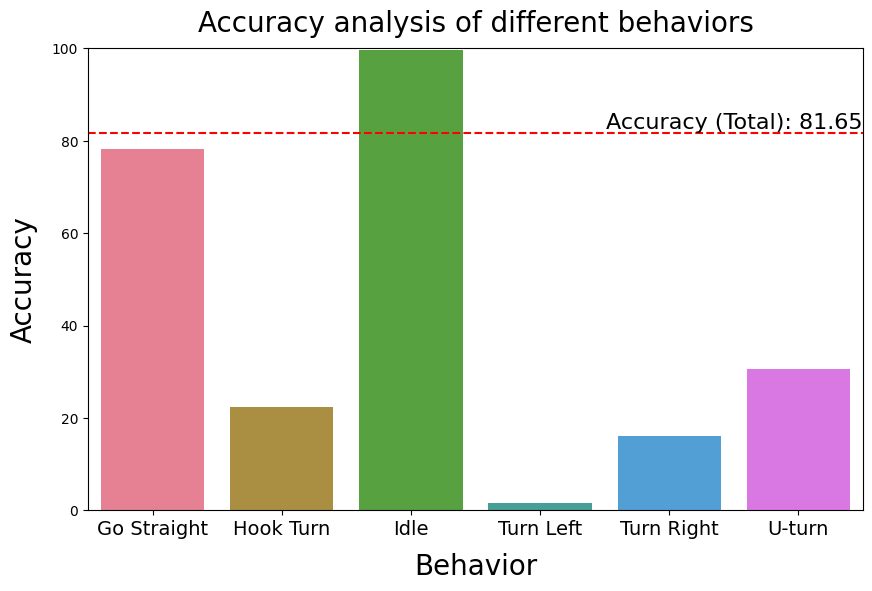

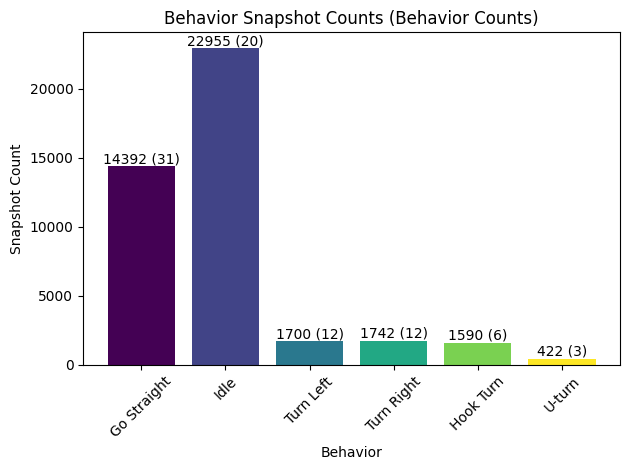

In [21]:
df_train = pd.read_csv(f'{train_name_file}.csv')
df_test = pd.read_csv(f'{test_name_file}_merged.csv')

DrivePSTs.train_vomm(df_train, 30, 11, False)

# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)']
# feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
#            'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration']
# feature = ['Z-axis Angular Velocity', 'Yaw (deg)', 'Y-axis Acceleration', 'Z-axis Acceleration',
#        'Pitch (deg)', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Roll (deg)', 'Vehicle Speed']
RF_10 = ['Ignition Coil Current Diagnosis','Engine RPM', 'Ignition Magnetization Time', 'Closed Loop Fuel Correction',
 'O2 Voltage','Vehicle Speed', 'X-axis Angular Velocity', 'Y-axis Angular Velocity','Z-axis Angular Velocity', 'Roll (deg)'] 

AutoTag.predict_cluster(df_test, RF_10, f'{train_name_file}_model.pkl', f'{test_name_file}_merged.csv')
Test_Data = DrivePSTs.test_vomm(df_test, 6, save_path=f'{test_name_file}_merged.csv')

Test_Data = Test_Data.dropna()

print(DrivePSTs.compute_accuracy(Test_Data, 6, None).to_markdown())
DrivePSTs.calculate_action_prediction_counts(Test_Data['Action'], Test_Data['Filter_Predict'], True)

else_.Calculate_behavior_count(f'{test_name_file}_merged.csv')

### **四、繪製資料點3D散佈圖**

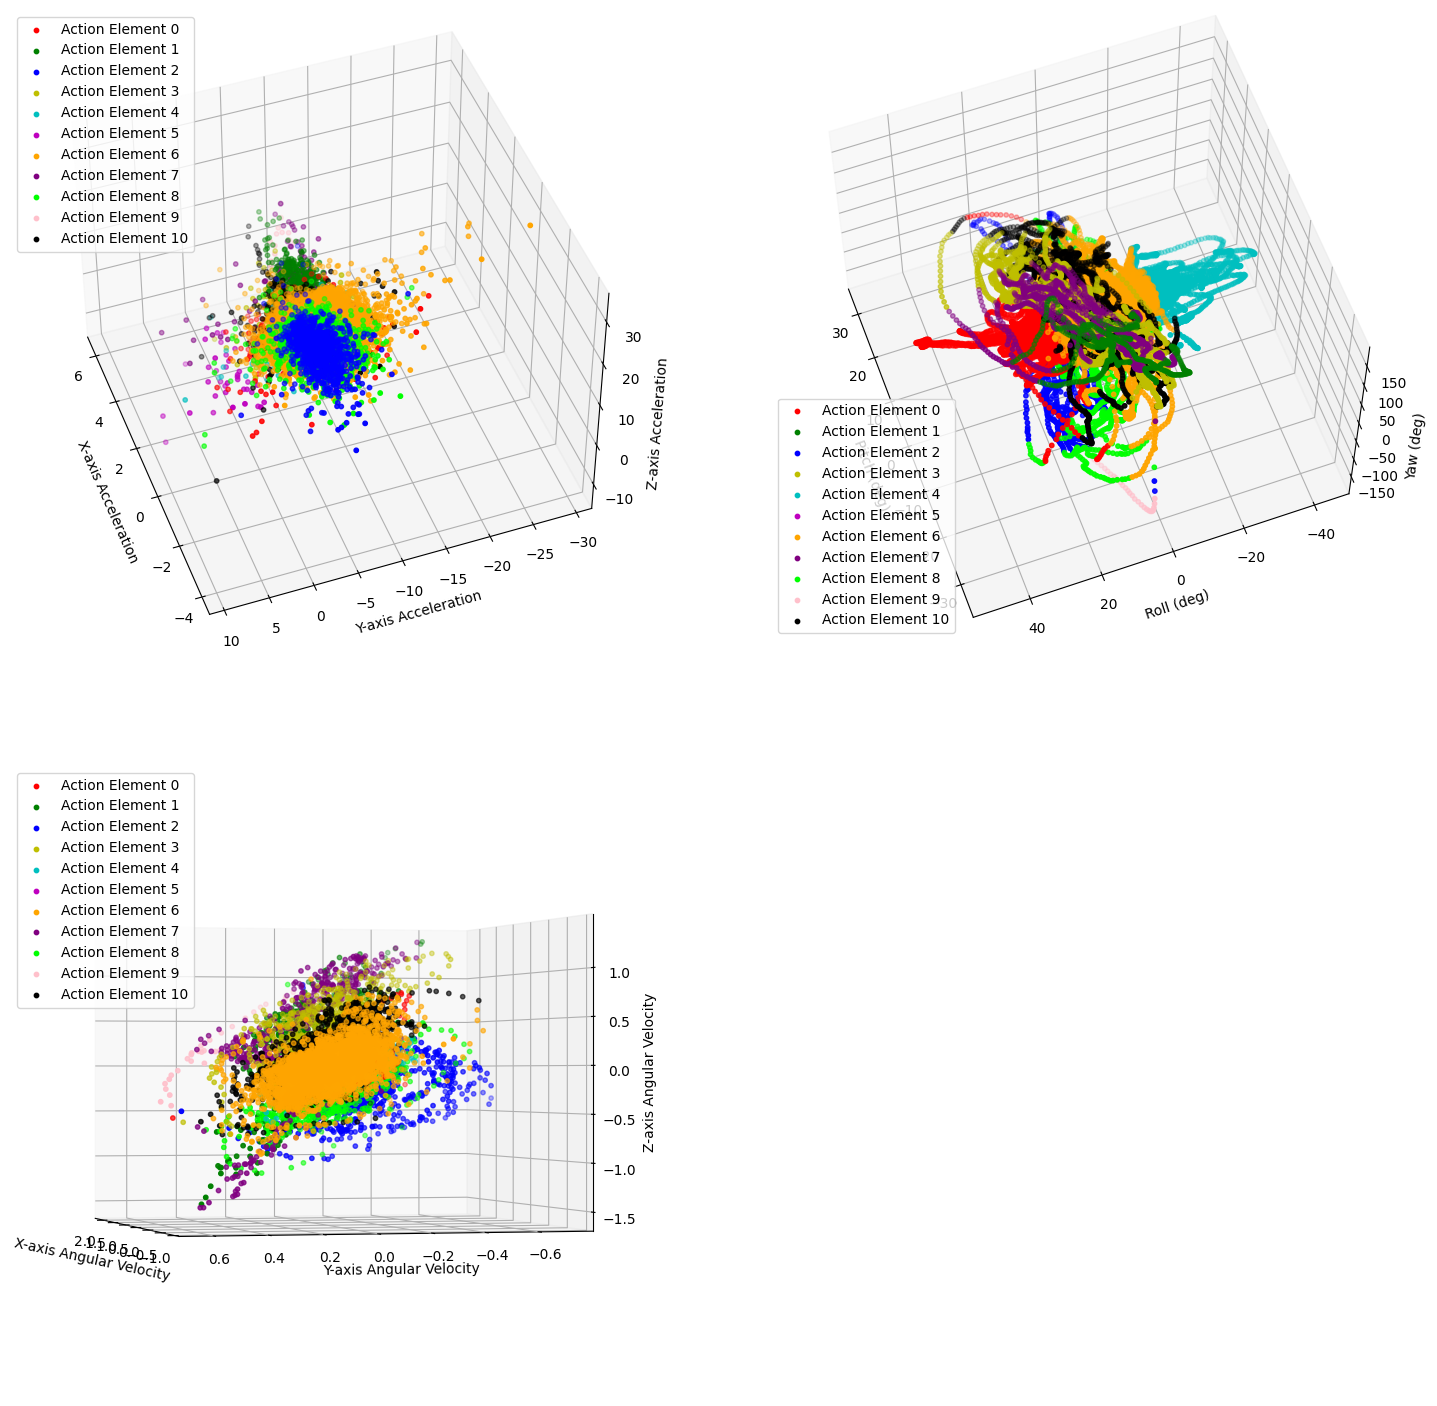

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load the provided CSV file
file_path = f'{test_name_file}_merged.csv'
data = pd.read_csv(file_path)

# Set up the 3D plot
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')

# Group data by 'Action Element' for color coding
groups = data.groupby('Action Element')

# Colors for each 'Action Element'
# colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink', 'k', 'grey']
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink', 'k']
# colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime', 'pink']

# count = 0  # 為了畫2個群組而已
for (key, group), color in zip(groups, colors):
    ax.scatter(group['X-axis Acceleration'], group['Y-axis Acceleration'], group['Z-axis Acceleration'], c=color, label=f'Action Element {key}', s=10)
    # count += 1
    # if count >= 2:
    #     break

ax.set_xlabel('X-axis Acceleration')
ax.set_ylabel('Y-axis Acceleration')
ax.set_zlabel('Z-axis Acceleration')

for (key, group), color in zip(groups, colors):
    bx.scatter(group['Pitch (deg)'], group['Roll (deg)'], group['Yaw (deg)'], c=color, label=f'Action Element {key}', s=10)

bx.set_xlabel('Pitch (deg)')
bx.set_ylabel('Roll (deg)')
bx.set_zlabel('Yaw (deg)')

# count = 0  # 為了畫2個群組而已
for (key, group), color in zip(groups, colors):
    cx.scatter(group['X-axis Angular Velocity'], group['Y-axis Angular Velocity'], group['Z-axis Angular Velocity'], c=color, label=f'Action Element {key}', s=10)
    # count += 1
    # if count >= 2:
    #     break

cx.set_xlabel('X-axis Angular Velocity')
cx.set_ylabel('Y-axis Angular Velocity')
cx.set_zlabel('Z-axis Angular Velocity')

# Legend
ax.view_init(elev=45, azim=160)  # elev=45, azim=160
bx.view_init(elev=60, azim=160)
cx.view_init(elev=0, azim=165)

ax.legend()
bx.legend()
cx.legend()

plt.show()

### **五、繪製駕駛行為軌跡**

In [ ]:
import Ridetrack
else_ = Ridetrack.else_()

feature = ['Z-axis Angular Velocity', 'Z-axis Angle', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angle', 'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Angle']

df = pd.read_csv(f'{name_file}_merged.csv')

AutoTag.predict_cluster(df, feature, '20240125_Eric_model.pkl', f'{name_file}_clustered.csv')

df_clustered = pd.read_csv(f'{name_file}_clustered.csv')

else_.Plot_Action_Track(df_clustered, 'Filter_Predict', 250, False)

Execution time: 0.0 hours 0.0 minutes 6.293150424957275 seconds


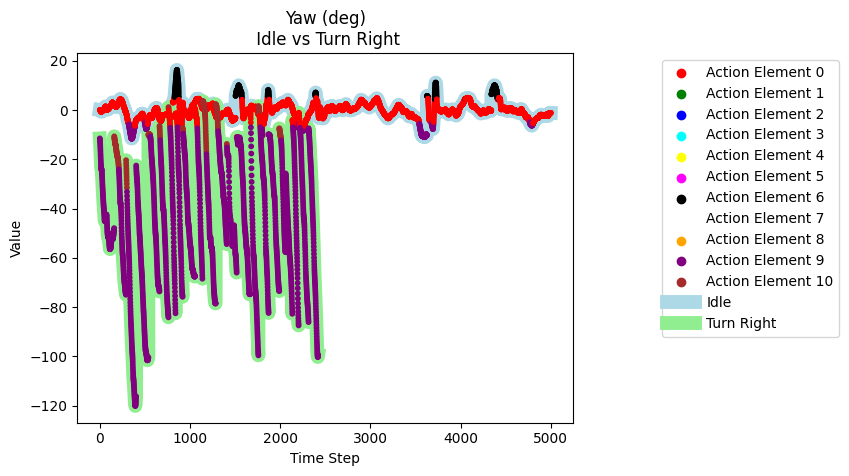

In [30]:
feature = ['Z-axis Angular Velocity', 'Y-axis Acceleration', 'Z-axis Acceleration',
           'X-axis Angular Velocity', 'Y-axis Angular Velocity', 'X-axis Acceleration',
           'Pitch (deg)', 'Roll (deg)', 'Yaw (deg)', 'Vehicle Speed']

df = pd.read_csv(f'{train_name_file}.csv')
AutoTag.predict_cluster(df, feature, 'mixed_data/mixed_train_model.pkl', f'{train_name_file}_clustered.csv')
df_clustered = pd.read_csv(f'{train_name_file}_clustered.csv')

else_.Plot_Action_Cluter(df_clustered, 'Idle', 'Turn Right', 'Yaw (deg)', 11, 5000, False)